# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;Homework 2
# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp;   211622600 - 208654475
##  &nbsp;Table of contents
### &nbsp;&nbsp;&nbsp;&nbsp;[Initial proccessing](#Initial-Proccessing)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #1](#Question-1)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #2](#Question-2)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #3](#Question-3)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #4](#Question-4)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #5](#Question-5)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Question #6](#Question-6)

# Initial Proccessing

In [442]:
import nltk
from nltk.probability import FreqDist
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import opinion_lexicon
from matplotlib import pyplot as plt
import math
from heapq import nlargest
import warnings
import emoji

lemmatizer = WordNetLemmatizer()
english_vocab = sorted(set(w.lower() for w in nltk.corpus.words.words()))
stopwords = set(nltk.corpus.stopwords.words("English"))
df = pd.read_csv('Twitter_data.csv')
descriptions = df['twitter_desc'].astype(str).replace("nan","")
all_names=df['twitter_name'].astype(str)
names=nltk.corpus.names
warnings.filterwarnings("ignore")

arabic_letters=['ÿ£','ÿ®','ÿ™','ÿ´','ÿ¨','ÿ≠','ÿÆ','ÿØ','ÿ∞','ÿ±','ÿ≤','ÿ≥','ÿ¥','ÿµ','ÿ∂','ÿ∑','ÿ∏','ÿπ','ÿ∫','ŸÅ','ŸÇ','ŸÉ','ŸÑ','ŸÖ','ŸÜ','ŸáŸÄ','Ÿà','Ÿä','ÿß','ÿ§','ŸÑÿß','ÿ¶','ÿ°',]
hebrew_letters=['◊ê','◊ë','◊í','◊ì','◊î','◊ï','◊ñ','◊ó','◊ò','◊ô','◊õ','◊ú','◊û','◊†','◊°','◊¢','◊§','◊¶','◊ß','◊®','◊©','◊™']

# Question 1

In [116]:
all_in_desk=[]
for description in descriptions:
    if description != None and type(description) != float:
        for word in nltk.word_tokenize(description):
            all_in_desk.append(word.lower())

In [118]:
word_lemmatization = [lemmatizer.lemmatize(word) for word in all_in_desk]
without_stopwords = [word for word in word_lemmatization if word not in stopwords]
english_vocab_set=set(english_vocab)
just_english_vocab = [word for word in without_stopwords if word in english_vocab_set]
word_lemmatization_freq=FreqDist(just_english_vocab)
most_common_30 = word_lemmatization_freq.most_common(30)
most_common_30

[('official', 3138),
 ('twitter', 2705),
 ('news', 2340),
 ('account', 1614),
 ('world', 1608),
 ('new', 1542),
 ('author', 1190),
 ('u', 1144),
 ('de', 927),
 ('follow', 830),
 ('music', 729),
 ('life', 727),
 ('tweet', 695),
 ('former', 687),
 ('actor', 675),
 ('sport', 650),
 ('time', 640),
 ('book', 638),
 ('love', 634),
 ('writer', 607),
 ('la', 589),
 ('booking', 588),
 ('home', 585),
 ('champion', 582),
 ('host', 580),
 ('page', 575),
 ('people', 569),
 ('business', 555),
 ('team', 550),
 ('since', 543)]

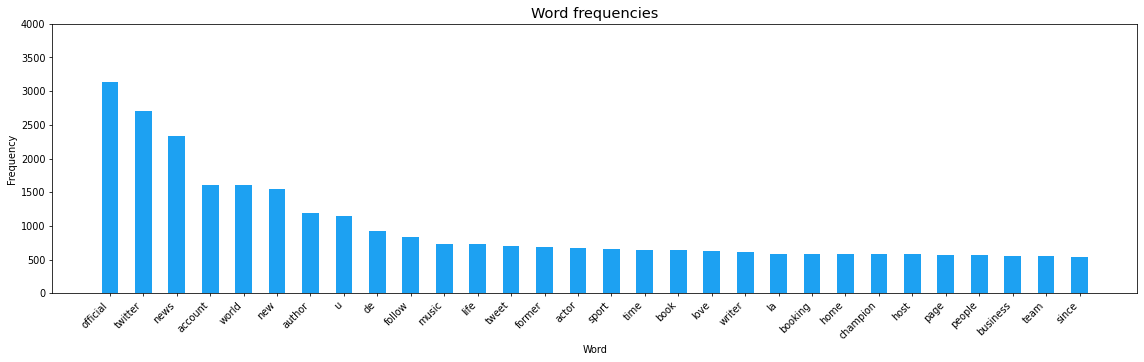

In [294]:
plot_words=[]
plot_frequencies=[]
for w,f in most_common_30:
    plot_words.append(w)
    plot_frequencies.append(f)

plt.figure(figsize=(20,5), dpi= 70)
plt.bar(plot_words, plot_frequencies, width=.5,color = '#1DA1F2')
plt.gca().set_xticklabels(plot_words, rotation=45, horizontalalignment= 'right')
plt.title("Word frequencies", fontsize=15)
plt.ylabel('Frequency')
plt.ylim(0, 4000)
plt.xlabel('Word')
plt.show()

# Question 2

In [120]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

In [121]:
male=[]
female=[]
for name in all_names:
    first_name = name.split()[0]
    if first_name not in stopwords:
        if first_name in male_names and first_name not in female_names:
            male.append(first_name)
        if first_name not in male_names and first_name in female_names:
            female.append(first_name)
print('male number is ',len(male))
print('female number is ',len(female))

male number is  6201
female number is  3298


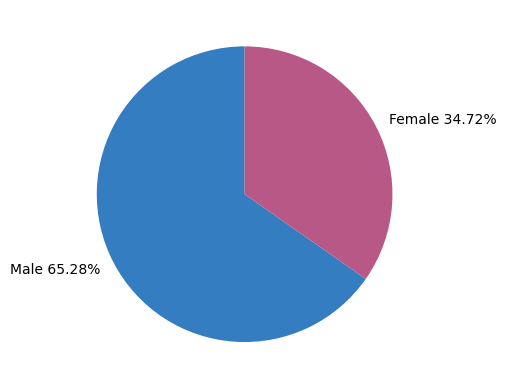

In [122]:
male_percentage = (len(male)/(len(male)+len(female)))*100
female_percentage = 100-male_percentage
labels = ['Male '+str(round(male_percentage, 2))+'%', 'Female '+str(round(female_percentage, 2))+'%']
plt.pie([male_percentage,female_percentage],colors=['#347DC1','#B85887'] ,labels = labels, startangle = 90)
plt.show() 

# Most common male names

In [123]:
male_frequency = FreqDist(male)

In [124]:
most_common_male_names = male_frequency.most_common(30)
most_common_male_names

[('David', 149),
 ('John', 139),
 ('Michael', 112),
 ('Mark', 91),
 ('Matt', 91),
 ('Mike', 80),
 ('Eric', 72),
 ('Ryan', 71),
 ('Kevin', 70),
 ('Steve', 70),
 ('Tom', 69),
 ('Peter', 67),
 ('James', 66),
 ('Joe', 66),
 ('Brian', 65),
 ('Jason', 63),
 ('Scott', 59),
 ('Josh', 59),
 ('Nick', 58),
 ('Paul', 58),
 ('Dan', 57),
 ('Jeff', 56),
 ('Jim', 53),
 ('Ben', 53),
 ('Jon', 53),
 ('Jonathan', 50),
 ('Andrew', 46),
 ('Robert', 45),
 ('Jeremy', 44),
 ('Aaron', 44)]

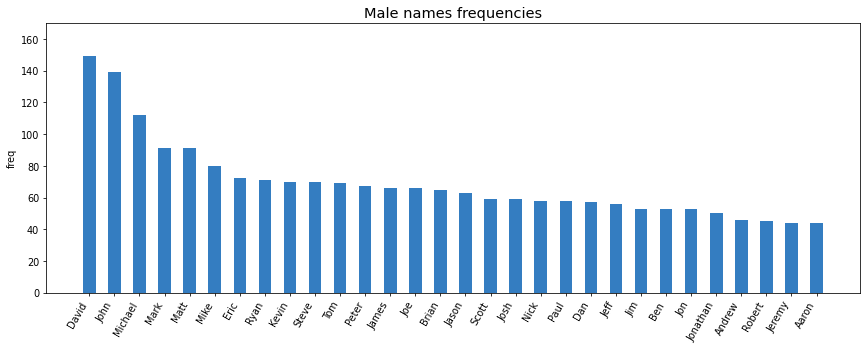

In [295]:
title ="Male names frequencies"
male_names=[]
male_frequencies=[]
for name,frequency in most_common_male_names:
    male_names.append(name)
    male_frequencies.append(frequency)
plt.figure(figsize=(15,5), dpi= 70)
plt.bar(male_names, male_frequencies, width=.5,color = '#347DC1')
plt.gca().set_xticklabels(male_names, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel('freq')
plt.ylim(0, 170)
plt.show()

# Most common female names

In [126]:
female_frequency = FreqDist(female)

In [127]:
most_common_female_names = female_frequency.most_common(30)
most_common_female_names

[('Sarah', 47),
 ('Jennifer', 44),
 ('Jessica', 42),
 ('Amy', 35),
 ('Kate', 33),
 ('Rachel', 32),
 ('Michelle', 30),
 ('Anna', 29),
 ('Laura', 29),
 ('Lisa', 27),
 ('Emily', 26),
 ('Melissa', 25),
 ('Elizabeth', 24),
 ('Karen', 23),
 ('Sara', 23),
 ('Susan', 22),
 ('Katie', 22),
 ('Amanda', 21),
 ('La', 20),
 ('Stephanie', 20),
 ('Maria', 20),
 ('Emma', 19),
 ('Atlanta', 19),
 ('Megan', 19),
 ('Nicole', 18),
 ('Amber', 18),
 ('Barbara', 18),
 ('Vanessa', 17),
 ('Samantha', 17),
 ('Danielle', 17)]

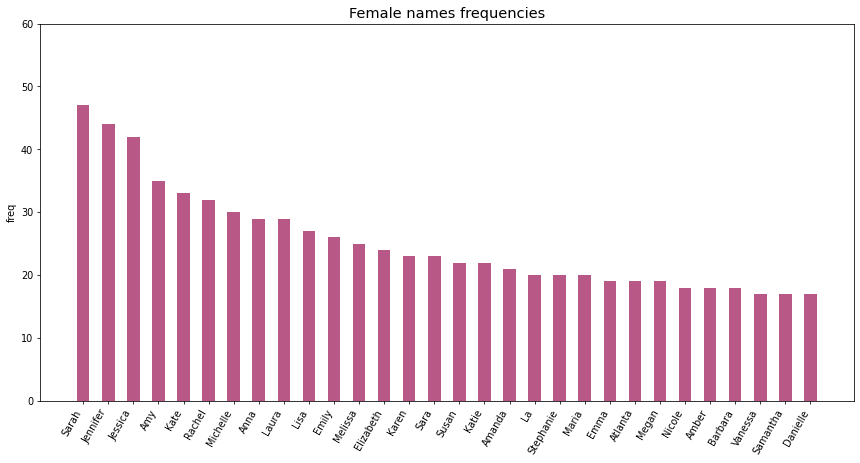

In [296]:
title ="Female names frequencies"
female_names=[]
female_frequencies=[]
for name,frequency in most_common_female_names:
    female_names.append(name)
    female_frequencies.append(frequency)
plt.figure(figsize=(15,7), dpi= 70)
plt.bar(female_names, female_frequencies, width=.5,color = '#B85887')
plt.gca().set_xticklabels(female_names, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel('freq')
plt.ylim(0, 60)
plt.show()

## Finding most common words per gender

In [129]:
male_descriptions=[]
female_descriptions=[]
for i in range(len(descriptions)):
    current_name = all_names[i]
    current_description = descriptions[i]
    if current_name.split()[0] in male:
        for word in nltk.word_tokenize(current_description):
            male_descriptions.append(word.lower())
    if current_name.split()[0] in female:
        for word in nltk.word_tokenize(current_description):
            female_descriptions.append(word.lower())

In [130]:
male_words_lemmatization=[lemmatizer.lemmatize(word) for word in male_descriptions]
male_words_no_stopwords = [word for word in male_words_lemmatization if word not in stopwords]
english_vocab_set = set(english_vocab)
male_english_words = [word for word in male_words_no_stopwords if word in english_vocab_set]


In [132]:
male_words_in_desc = FreqDist(male_english_words)
plot_male_word=[]
plot_male_word_freq=[]
for word,frequency in male_words_in_desc.most_common(30):
    plot_male_word.append(word)
    plot_male_word_freq.append(frequency)

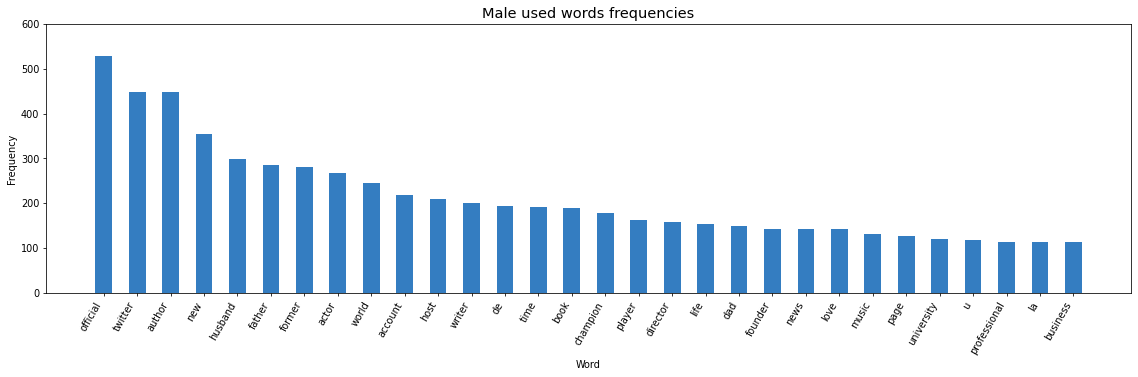

In [297]:
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(plot_male_word, plot_male_word_freq, width=.5,color = '#347DC1')
plt.gca().set_xticklabels(plot_male_word, rotation=60, horizontalalignment= 'right')
plt.title("Male used words frequencies", fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 600)
plt.xlabel("Word")
plt.show()

In [134]:
female_words_lemmatization=[lemmatizer.lemmatize(word) for word in female_descriptions]
female_words_no_stopwords = [word for word in female_words_lemmatization if word not in stopwords]
english_vocab_set = set(english_vocab)
female_english_words = [word for word in female_words_no_stopwords if word in english_vocab_set]

In [298]:
female_words_in_desc = FreqDist(female_english_words)
plot_female_word=[]
plot_female_word_freq=[]
for word,frequency in female_words_in_desc.most_common(30):
    plot_female_word.append(word)
    plot_female_word_freq.append(frequency)

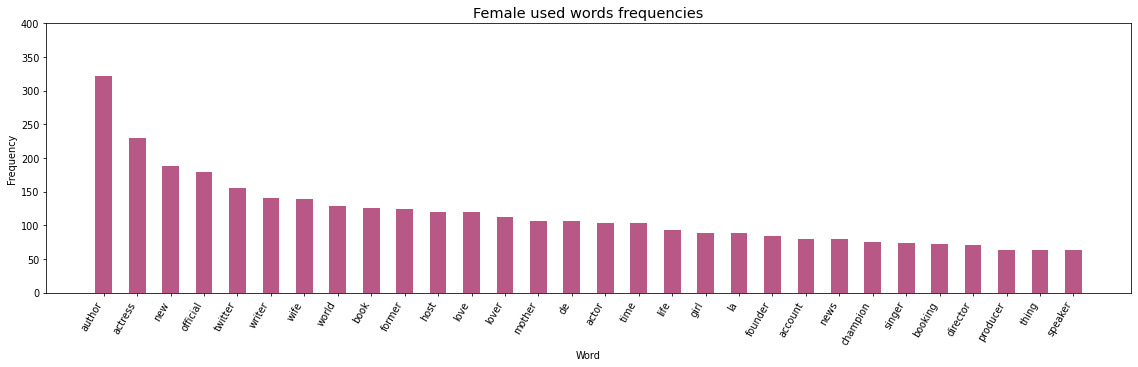

In [299]:
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(plot_female_word, plot_female_word_freq, width=.5,color = '#B85887')
plt.gca().set_xticklabels(plot_female_word, rotation=60, horizontalalignment= 'right')
plt.title("Female used words frequencies", fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 400)
plt.xlabel("Word")
plt.show()

## Shared common words between both genders

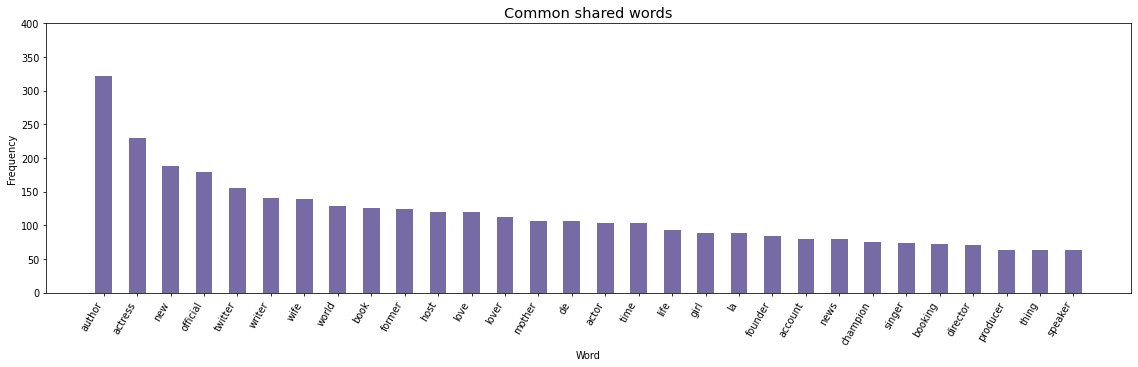

In [300]:
common_shared_words = [word for word in female_english_words if word in male_english_words]
common_shared_words_dist = FreqDist(common_shared_words)

shared_words = []
shared_words_frequency = []
for word,frequency in common_shared_words_dist.most_common(30):
    shared_words.append(word)
    shared_words_frequency.append(frequency)
    
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(shared_words, shared_words_frequency, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(shared_words, rotation=60, horizontalalignment= 'right')
plt.title("Common shared words", fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 400)
plt.xlabel("Word")
plt.show()

## ?◊î◊ê◊ù ◊ô◊© ◊î◊ë◊ì◊ú◊ô◊ù ◊ê◊ï ◊ì◊û◊ô◊ï◊ü ◊ë◊®◊©◊ô◊û◊ï◊™? ◊û◊ì◊ï◊¢ ◊ú◊ì◊¢◊™◊õ◊ù

### As we can see, Females tend to use words that are more feminine words, while males tend to use more manly words, but looking at the results from the chart above, there are some shared common words between both genders

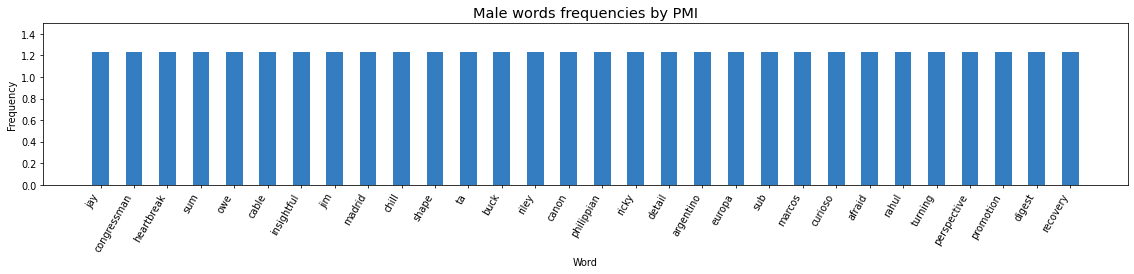

In [301]:
male_word_PMI={}

for word in male_words_in_desc.keys():
    temp = female_words_in_desc.get(word) if word in female_words_in_desc.keys() else 0
    current_word = male_words_in_desc.get(word)
    pr_w_class = current_word/len(male_english_words)
    pr_w = (male_words_in_desc.get(word)+temp)/(len(male_english_words)+len(female_english_words))
    pr_class = len(male)/(len(male)+len(female))
    male_word_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))

top_30_male_words_PMI = sorted(male_word_PMI,reverse=True,key=male_word_PMI.get)[:30]
male_PMI_words=[]
male_PMI_words_frequency=[]
for word in top_30_male_words_PMI:
    male_PMI_words.append(word)
    male_PMI_words_frequency.append(male_word_PMI.get(word))
    
plt.figure(figsize=(20,3), dpi= 70)
plt.bar(male_PMI_words, male_PMI_words_frequency, width=.5,color = '#347DC1')
plt.gca().set_xticklabels(male_PMI_words, rotation=60, horizontalalignment= 'right')
plt.title("Male words frequencies by PMI", fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 1.5)
plt.xlabel("Word")
plt.show()


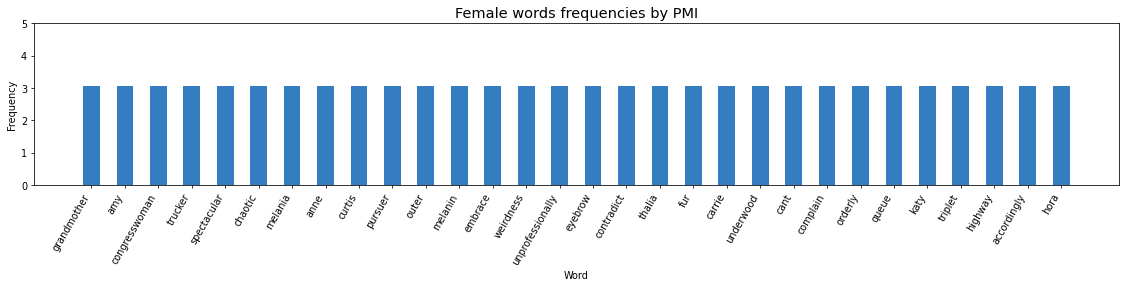

In [302]:
female_word_PMI={}

for word in female_words_in_desc.keys():
    temp = male_words_in_desc.get(word) if word in male_words_in_desc.keys() else 0
    current_word = female_words_in_desc.get(word)
    pr_w_class = current_word/len(female_english_words)
    pr_w = (female_words_in_desc.get(word)+temp)/(len(female_english_words)+len(male_english_words))
    pr_class = len(female)/(len(female)+len(male))
    female_word_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))
    
top_30_female_words_PMI = sorted(female_word_PMI,reverse=True,key=female_word_PMI.get)[:30]
female_PMI_words=[]
female_PMI_words_frequency=[]
for word in top_30_female_words_PMI:
    female_PMI_words.append(word)
    female_PMI_words_frequency.append(female_word_PMI.get(word))
    
plt.figure(figsize=(20,3), dpi= 70)
plt.bar(female_PMI_words, female_PMI_words_frequency, width=.5,color = '#347DC1')
plt.gca().set_xticklabels(female_PMI_words, rotation=60, horizontalalignment= 'right')
plt.title("Female words frequencies by PMI", fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 5)
plt.xlabel("Word")
plt.show()

## ◊î◊ê◊ù ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊©◊ï◊†◊ï◊™ ◊û◊û◊î ◊©◊ß◊ô◊ë◊ú◊™◊ù ◊ë◊°◊¢◊ô◊£ ◊î◊ß◊ï◊ì◊ù ◊©◊ú ◊©◊ê◊ú◊î ◊ñ◊ï? ◊ë◊ê◊ô◊ñ◊î ◊ê◊ï◊§◊ü? ◊û◊î ◊†◊ô◊™◊ü ◊ú◊ú◊û◊ï◊ì ◊û◊î◊™◊ï◊¶◊ê◊ï◊™?

### Yes the results are different, since we can see that when we applied the PMI, we got rid of the shared words which was polluting the results from before, now we can make more sense of the result.

# Question 3

In [267]:
musical_artist_data = df[df['type1']=='MusicalArtist']['twitter_desc']
non_musical_artist_data = df[df['type1']!='MusicalArtist']['twitter_desc']
musical_artist_descriptions = nltk.word_tokenize(" ".join([str(description) for description in musical_artist_data]))
non_musical_artist_descriptions = nltk.word_tokenize(" ".join([str(description) for description in non_musical_artist_data]))

In [344]:
musical_artist_lemmatization=[lemmatizer.lemmatize(word.lower()) for word in musical_artist_descriptions if word != "nan"]
non_musical_artist_lemmatization = [lemmatizer.lemmatize(word.lower()) for word in non_musical_artist_descriptions if word != "nan"]

musical_artist_no_stopwords = [word for word in musical_artist_lemmatization if word not in stopwords]
non_musical_artist_no_stopwords = [word for word in non_musical_artist_lemmatization if word not in stopwords]

english_vocab_set = set(english_vocab)
musical_artist_words = [word for word in musical_artist_no_stopwords if word in english_vocab_set]
non_musical_artist_words = [word for word in non_musical_artist_no_stopwords if word in english_vocab_set]


In [308]:
musical_artists=0
non_musical_artists=0
type1 = df['type1'].astype(str)
for i in range(len(type1)):
    if type1[i].split()[0] == 'MusicalArtist':
        musical_artists = musical_artists + 1
    if type1[i].split()[0] != 'MusicalArtist':
        non_musical_artists = non_musical_artists + 1

3463

In [309]:
musical_artist_dist = FreqDist(musical_artist_words)
non_musical_artist_dist = FreqDist(non_musical_artist_words)

FreqDist({'new': 394, 'booking': 378, 'album': 273, 'music': 258, 'official': 236, 'twitter': 209, 'available': 157, 'singer': 151, 'artist': 144, 'producer': 139, ...})

In [326]:
musical_artist_PMI = {}
for word in musical_artist_dist.keys():
    control = non_musical_artist_dist.get(word) if word in non_musical_artist_dist.keys() else 0
    pr_w_class = musical_artist_dist.get(word)/sum(musical_artist_dist.values())
    pr_w =(musical_artist_dist.get(word)+control)/(sum(musical_artist_dist.values())+sum(non_musical_artist_dist.values()))
    pr_class = musical_artists/(musical_artists+non_musical_artists)
    musical_artist_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))

In [419]:
top_30_musical_artist_words_PMI = sorted(musical_artist_PMI,reverse=True,key=musical_artist_PMI.get)[:30]

musical_artist_words=[]
musical_artist_words_frequency=[]
for word in top_30_musical_artist_words_PMI:
    musical_artist_words.append(word)
    musical_artist_words_frequency.append(musical_artist_PMI.get(word))
pd.DataFrame({'Word': musical_artist_words,'Frequency': musical_artist_words_frequency})


Word  Frequency
0            owe    6.68017
1         indigo    6.68017
2       playback    6.68017
3           dura    6.68017
4        melanin    6.68017
5           opus    6.68017
6         cantor    6.68017
7     contradict    6.68017
8         thalia    6.68017
9         harass    6.68017
10       enteron    6.68017
11         pombo    6.68017
12         petal    6.68017
13         armor    6.68017
14  miseducation    6.68017
15         negro    6.68017
16         canto    6.68017
17          toco    6.68017
18      commando    6.68017
19     whispered    6.68017
20        litter    6.68017
21      highroad    6.68017
22     balladeer    6.68017
23   electrician    6.68017
24       godlike    6.68017
25   omnipresent    6.68017
26  approachable    6.68017
27          suzy    6.68017
28       explain    6.68017
29         agora    6.68017

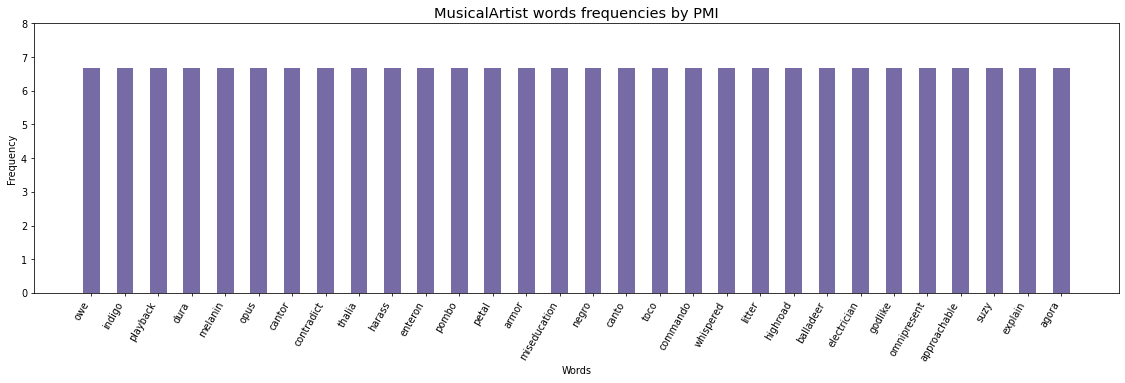

In [421]:
title ="MusicalArtist words frequencies by PMI"
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(musical_artist_words, musical_artist_words_frequency, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(musical_artist_words, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 8)
plt.xlabel("Words")
plt.show()

In [330]:
non_musical_artist_PMI = {}
for word in non_musical_artist_dist.keys():
    control = musical_artist_dist.get(word) if word in musical_artist_dist.keys() else 0
    pr_w_class = non_musical_artist_dist.get(word)/sum(non_musical_artist_dist.values())
    pr_w =(non_musical_artist_dist.get(word)+control)/(sum(non_musical_artist_dist.values())+sum(musical_artist_dist.values()))
    pr_class = non_musical_artists/(non_musical_artists+musical_artists)
    non_musical_artist_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))

In [423]:
top_30_non_musical_artist_words_PMI = sorted(non_musical_artist_PMI,reverse=True,key=non_musical_artist_PMI.get)[:30]
non_musical_artist_words=[]
non_musical_artist_words_frequency=[]
for word in top_30_non_musical_artist_words_PMI:
    non_musical_artist_words.append(word)
    non_musical_artist_words_frequency.append(non_musical_artist_PMI.get(word))
pd.DataFrame({'Word': non_musical_artist_words,'Frequency': non_musical_artist_words_frequency})

Word  Frequency
0           india    0.30622
1        analysis    0.30622
2           cable    0.30622
3     grandfather    0.30622
4         clinton    0.30622
5       governing    0.30622
6         cabinet    0.30622
7   correspondent    0.30622
8         comment    0.30622
9            term    0.30622
10       thinking    0.30622
11         choose    0.30622
12         course    0.30622
13           heat    0.30622
14         jersey    0.30622
15     industrial    0.30622
16       giveaway    0.30622
17       struggle    0.30622
18        variety    0.30622
19           pour    0.30622
20          lemon    0.30622
21           cost    0.30622
22       retailer    0.30622
23         forget    0.30622
24           kill    0.30622
25           tool    0.30622
26     engagement    0.30622
27          skill    0.30622
28          worth    0.30622
29         labour    0.30622

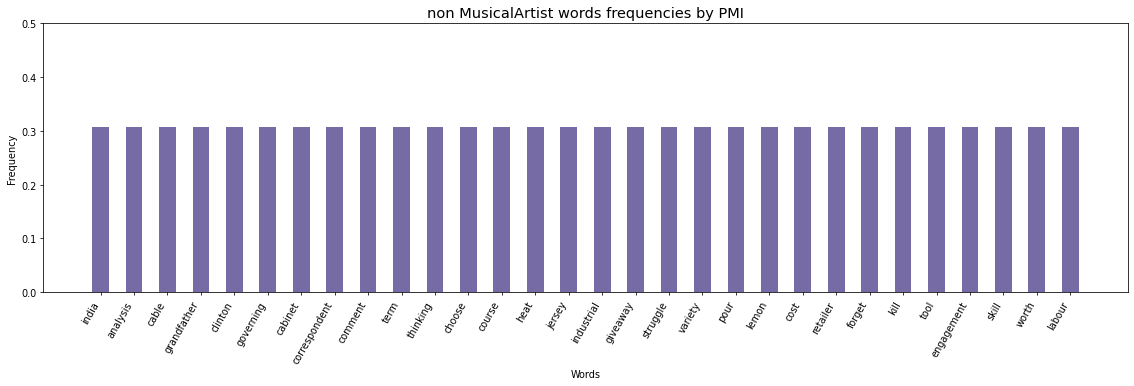

In [424]:
title ="non MusicalArtist words frequencies by PMI"
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(non_musical_artist_words, non_musical_artist_words_frequency, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(non_musical_artist_words, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 0.5)
plt.xlabel("Words")
plt.show()

## ? ◊î◊°◊ë◊ô◊®◊ï ◊ê◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ - ◊î◊ê◊ù ◊î◊ü ◊î◊í◊ô◊ï◊†◊ô◊ï◊™ ◊ë◊¢◊ô◊†◊ô◊õ◊ù

### As we can see, musical artists tend to tweet more about music related stuff than non musical artists 

In [343]:
politician_data = df[df['type1']=='Politician']['twitter_desc']
non_politician_data = df[df['type1']!='Politician']['twitter_desc']
politician_descriptions = nltk.word_tokenize(" ".join([str(description) for description in politician_data]))
non_politician_descriptions = nltk.word_tokenize(" ".join([str(description) for description in non_politician_data]))

In [345]:
politician_lemmatization=[lemmatizer.lemmatize(word.lower()) for word in politician_descriptions if word != "nan"]
non_politician_lemmatization = [lemmatizer.lemmatize(word.lower()) for word in non_politician_descriptions if word != "nan"]

politician_no_stopwords = [word for word in politician_lemmatization if word not in stopwords]
non_politician_no_stopwords = [word for word in non_politician_lemmatization if word not in stopwords]

english_vocab_set = set(english_vocab)
politician_words = [word for word in politician_no_stopwords if word in english_vocab_set]
non_politician_words = [word for word in non_politician_no_stopwords if word in english_vocab_set]

In [350]:
politician_dist = FreqDist(politician_words)
non_politician_dist = FreqDist(non_politician_words)

In [355]:
politicians=0
non_politicians=0
type1 = df['type1'].astype(str)
for i in range(len(type1)):
    if type1[i].split()[0] == 'Politician':
        politicians = politicians + 1
    if type1[i].split()[0] != 'Politician':
        non_politicians = non_politicians + 1

In [356]:
politician_PMI = {}
for word in politician_dist.keys():
    control = non_politician_dist.get(word) if word in non_politician_dist.keys() else 0
    pr_w_class = politician_dist.get(word)/sum(politician_dist.values())
    pr_w =(politician_dist.get(word)+control)/(sum(politician_dist.values())+sum(non_politician_dist.values()))
    pr_class = politicians/(politicians+non_politicians)
    politician_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))

In [357]:
top_30_politician_words_PMI = sorted(politician_PMI,reverse=True,key=politician_PMI.get)[:30]
politician_words=[]
politician_words_frequency=[]
for word in top_30_politician_words_PMI:
    politician_words.append(word)
    politician_words_frequency.append(politician_PMI.get(word))
pd.DataFrame({'Word': politician_words,'Frequency': politician_words_frequency})

Word  Frequency
0          rahul   8.951036
1        wealthy   8.951036
2         lilian   8.951036
3           mari   8.951036
4         amelia   8.951036
5        soldado   8.951036
6     vasundhara   8.951036
7          sahib   8.951036
8           hind   8.951036
9         patria   8.951036
10        teresa   8.951036
11  municipality   8.951036
12      servidor   8.951036
13        pronto   8.951036
14      narendra   8.951036
15       shriver   8.951036
16      defensor   8.951036
17        tagged   8.951036
18          meio   8.951036
19   alleviation   8.951036
20          awan   8.951036
21          puno   8.951036
22         maire   8.951036
23         mitch   8.951036
24   antiquarian   8.951036
25           tod   8.951036
26      vladimir   8.951036
27           tun   8.951036
28      hacienda   8.951036
29        abuser   8.951036

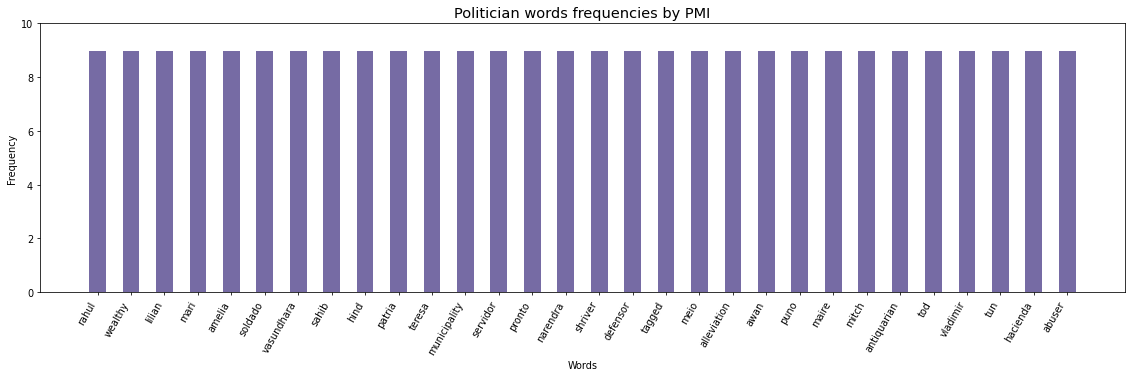

In [425]:
title ="Politician words frequencies by PMI"
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(politician_words, politician_words_frequency, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(politician_words, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 10)
plt.xlabel("Words")
plt.show()

In [362]:
non_politician_PMI = {}
for word in non_politician_dist.keys():
    control = politician_dist.get(word) if word in politician_dist.keys() else 0
    pr_w_class = non_politician_dist.get(word)/sum(non_politician_dist.values())
    pr_w =(non_politician_dist.get(word)+control)/(sum(non_politician_dist.values())+sum(politician_dist.values()))
    pr_class = non_politicians/(non_politicians+politicians)
    non_politician_PMI[word]=math.log2(pr_w_class/(pr_w*pr_class))

In [363]:
top_30_non_politician_words_PMI = sorted(non_politician_PMI,reverse=True,key=non_politician_PMI.get)[:30]
non_politician_words=[]
non_politician_words_frequency=[]
for word in top_30_non_politician_words_PMI:
    non_politician_words.append(word)
    non_politician_words_frequency.append(non_politician_PMI.get(word))
pd.DataFrame({'Word': non_politician_words,'Frequency': non_politician_words_frequency})

Word  Frequency
0          rare    0.13325
1     difficult    0.13325
2        bright    0.13325
3           lit    0.13325
4           sum    0.13325
5      extended    0.13325
6      newsroom    0.13325
7      achiever    0.13325
8        hatred    0.13325
9   beautifully    0.13325
10        jesus    0.13325
11     euphoria    0.13325
12      leading    0.13325
13      shotgun    0.13325
14     vertical    0.13325
15       maroon    0.13325
16         buck    0.13325
17     humanity    0.13325
18      actress    0.13325
19        riley    0.13325
20        canon    0.13325
21      wildcat    0.13325
22   philippian    0.13325
23         seth    0.13325
24        ricky    0.13325
25      curious    0.13325
26    otherwise    0.13325
27       aerial    0.13325
28        outer    0.13325
29      winning    0.13325

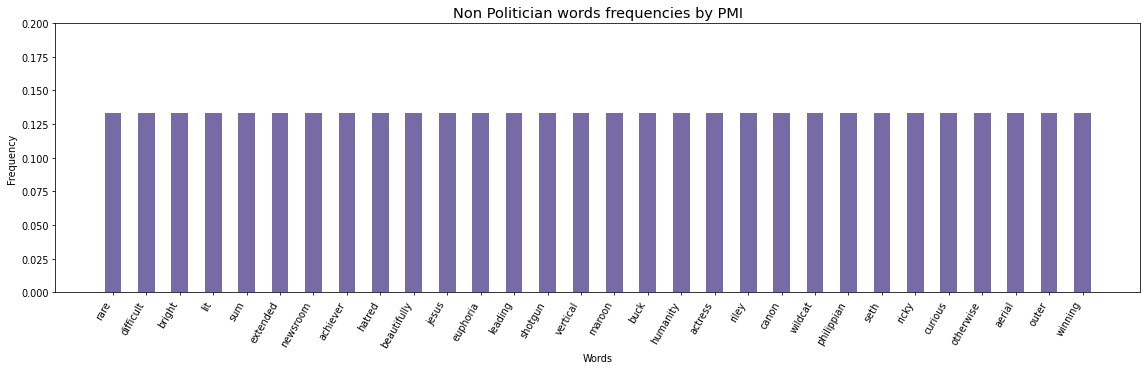

In [426]:
title ="Non Politician words frequencies by PMI"
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(non_politician_words, non_politician_words_frequency, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(non_politician_words, rotation=60, horizontalalignment= 'right')
plt.title(title, fontsize=15)
plt.ylabel("Frequency")
plt.ylim(0, 0.2)
plt.xlabel("Words")
plt.show()

## ◊ì◊ï◊†◊ï ◊ë◊™◊ï◊¶◊ê◊ï◊™

### As we can tell, Politicians usually tweet about politics more than non Politicians

# Question 4

In [370]:
positive_words=set(opinion_lexicon.positive())
negative_words=set(opinion_lexicon.negative())

In [372]:
sentiment_value = 0
user_descriptions = {}
users = {}
for i in range(len(descriptions)):
    tokenized_words = nltk.word_tokenize(descriptions[i])
    for word in tokenized_words:
        if word in positive_words:
            sentiment_value += 1
        elif word in negative_words:
            sentiment_value -= 1
    users[all_names[i]] = sentiment_value
    user_descriptions[all_names[i]] = descriptions[i]
    sentiment_value = 0

In [428]:
top_10_sentiment_descriptions = sorted(users,reverse=True,key=users.get)[:10]
user=[]
description=[]
sentiment_value=[]
for key in top_10_sentiment_descriptions:
    user.append(key)
    description.append(user_descriptions.get(key))
    sentiment_value.append(users.get(key))
pd.DataFrame({'User': user, 'Description':description , 'Sentiment': sentiment_value})

User                                        Description  \
0              Citrix  With an intelligent workspace, suddenly work d...   
1              Upwork  Upwork is the leading online talent solution. ...   
2         Robb Report  Robb Report is the manual of modern luxury, sy...   
3              Meijer  A Midwestern, family-owned superstore. Bringin...   
4  Exelon Corporation  We believe that reliable, clean and affordable...   
5           Brandless  Live well. Take care. Do good. \n\nWe make stu...   
6        Mark Ruffalo  A husband, father, actor, director, and a clim...   
7   Tracee Ellis Ross  Actively compassionate advocate for freedom, e...   
8      Mario Chalmers  Being a father is my pride & joy, & playing ba...   
9                OPPO  OPPO is a leading global smart device brand. O...   

   Sentiment  
0          7  
1          6  
2          6  
3          6  
4          6  
5          6  
6          5  
7          5  
8          5  
9          5

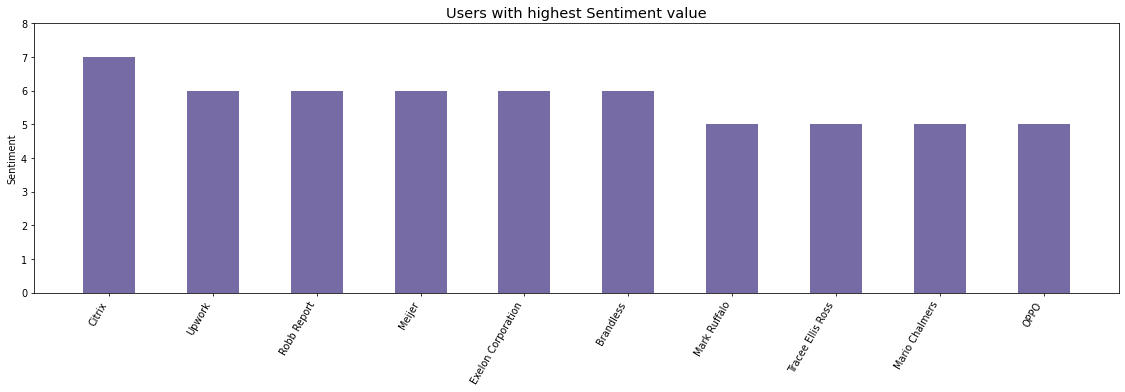

In [429]:
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(user, sentiment_value, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(user, rotation=60, horizontalalignment= 'right')
plt.title("Users with highest Sentiment value", fontsize=15)
plt.ylabel("Sentiment")
plt.ylim(0, 8)
plt.show()

In [434]:
top_10_sentiment_descriptions = sorted(users,reverse=False,key=users.get)[:10]
user=[]
description=[]
sentiment_value=[]
for key in top_10_sentiment_descriptions:
    user.append(key)
    description.append(user_descriptions.get(key))
    sentiment_value.append(users.get(key))
pd.DataFrame({'User': user, 'Description':description , 'Sentiment': sentiment_value})

User  \
0    CEO Of Social Distancing.   
1                 Torii Hunter   
2             Yanis Varoufakis   
3                Carlos Maza üåπ   
4               fleetstreetfox   
5                   Mark Cuban   
6           BITCHIMBELLATHORNE   
7                 Brad Paisley   
8  Southern Poverty Law Center   
9         Int'l Criminal Court   

                                         Description  Sentiment  
0  The rumors of my demise have been greatly exag...         -5  
1  Fear, doubt, and worry destroys your dreams. I...         -5  
2  Economics professor, quietly writing obscure e...         -4  
3  Marxist pig. Liberal fascist. Queer scum. He/H...         -4  
4  Fleet Street hack and author. Often sarcastic,...         -4  
5  Entrepreneur. Shark tank. Investor. Mishegas. ...         -3  
6  my book has been number one for I can‚Äôt even c...         -3  
7  In 1972, a crack commando unit was sent to pri...         -3  
8  The Southern Poverty Law Center combats hate, ...         -3  
9  International Criminal Court (ICC): fighting i...         -3

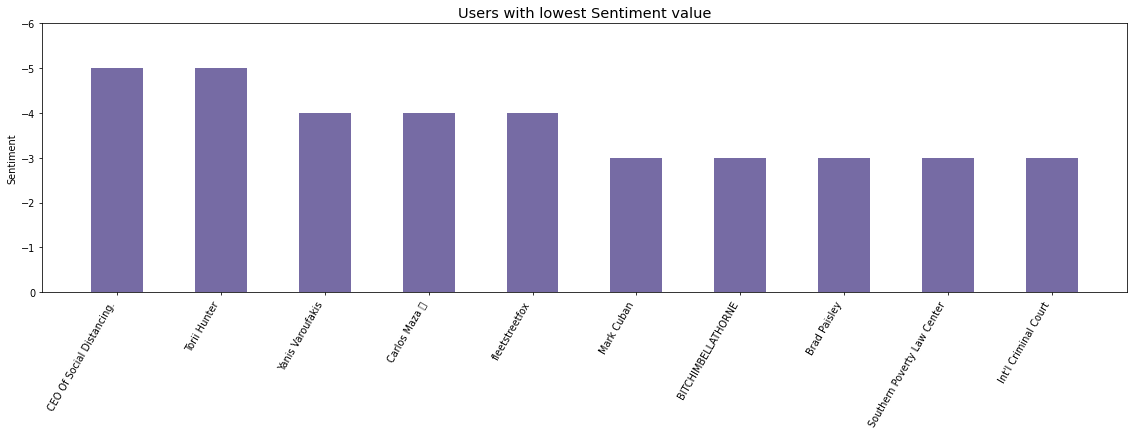

In [435]:
plt.figure(figsize=(20,5), dpi= 70)
plt.bar(user, sentiment_value, width=.5,color = '#766BA4')
plt.gca().set_xticklabels(user, rotation=60, horizontalalignment= 'right')
plt.title("Users with lowest Sentiment value", fontsize=15)
plt.ylabel("Sentiment")
plt.ylim(0, -6)
plt.show()

## ◊ì◊ï◊†◊ï ◊ë◊™◊ï◊¶◊ê◊ï◊™ ‚Äì ◊î◊ê◊ù ◊î◊í◊ô◊ï◊†◊ô◊ï◊™ ‚Äì ◊û◊ì◊ï◊¢ ◊õ◊ü\◊ú◊ê

### The way we calculate the sentiment value of a tweet is by adding one for each positive word, and taking one for each negative word, giving us the total sentiment value of the tweet

# Question 5

In [389]:
arabic_descriptions = 0
is_arabic = False
for i in range(len(descriptions)):
    for word in nltk.word_tokenize(descriptions[i]):
        for letter in word:
            if letter in arabic_letters and is_arabic == False:
                arabic_descriptions += 1
                is_arabic = True
    is_arabic = False
print("The number of twitter descriptions containing arabic letters is: ", arabic_descriptions)

The number of twitter descriptions containing arabic letters is:  60


In [391]:
hebrew_descriptions = 0
is_hebrew = False
for i in range(len(descriptions)):
    for word in nltk.word_tokenize(descriptions[i]):
        for letter in word:
            if letter in hebrew_letters and is_hebrew == False:
                hebrew_descriptions += 1
                is_hebrew = True
    is_hebrew = False
print("The number of twitter descriptions containing hebrew letters is: ", hebrew_descriptions)

The number of twitter descriptions containing hebrew letters is:  11


In [393]:
print("The percentage of twitter descriptions that contain arabic letters is: ",arabic_descriptions/len(descriptions))
print("The percentage of twitter desc that include hebrow letters is: ",hebrew_descriptions/len(descriptions))
print("The percentage of twitter desc that include hebrow letters or arabic letters is: ",(arabic_descriptions+hebrew_descriptions)/len(descriptions))

The percentage of twitter descriptions that contain arabic letters is:  0.002064480611086261
The percentage of twitter desc that include hebrow letters is:  0.0003784881120324812
The percentage of twitter desc that include hebrow letters or arabic letters is:  0.002442968723118742


# Question 6

In [403]:
emojis=[]
for i in range(len(descriptions)):
    for word in nltk.word_tokenize(descriptions[i]):
        for letter in word:
            if emoji.is_emoji(letter):
                emojis.append(letter)
emojis_dist = FreqDist(emojis)

In [443]:
emojis=[]
codes=[]
count=[]
top_used_emojis = sorted(emojis_dist, key=emojis_dist.get,reverse=True)[:30]
for key in top_used_emojis:
    emojis.append(key)
    count.append(emojis_dist.get(key))
    codes.append(emoji.demojize(key))
pd.DataFrame({'Code': codes,'Emoji': emojis, 'Count':count})

Code Emoji  Count
0                       :red_heart:     ‚ù§    231
1                        :sparkles:     ‚ú®    194
2    :backhand_index_pointing_down:     üëá    181
3                          :trophy:     üèÜ    171
4                 :light_skin_tone:     üèª    168
5          :medium-light_skin_tone:     üèº    148
6                      :down_arrow:     ‚¨á    132
7           :medium-dark_skin_tone:     üèæ    112
8                      :registered:     ¬Æ    107
9                :medium_skin_tone:     üèΩ    105
10                           :fire:     üî•     99
11                    :right_arrow:     ‚û°     95
12  :backhand_index_pointing_right:     üëâ     93
13                        :rainbow:     üåà     90
14                     :trade_mark:     ‚Ñ¢     80
15                   :high_voltage:     ‚ö°     79
16                    :soccer_ball:     ‚öΩ     77
17                     :television:     üì∫     72
18                   :folded_hands:     üôè     70
19         :globe_showing_Americas:     üåé     68
20                           :star:     ‚≠ê     68
21                    :female_sign:     ‚ôÄ     65
22                  :musical_notes:     üé∂     64
23                            :sun:     ‚òÄ     59
24                          :books:     üìö     54
25                          :ghost:     üëª     52
26              :camera_with_flash:     üì∏     51
27                          :dizzy:     üí´     51
28        :mobile_phone_with_arrow:     üì≤     50
29                     :white_flag:     üè≥     49